## Imports

In [2]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd


import tensorflow as tf
from tensorflow.keras import layers

## EDA (Exploratory Data Analysis)

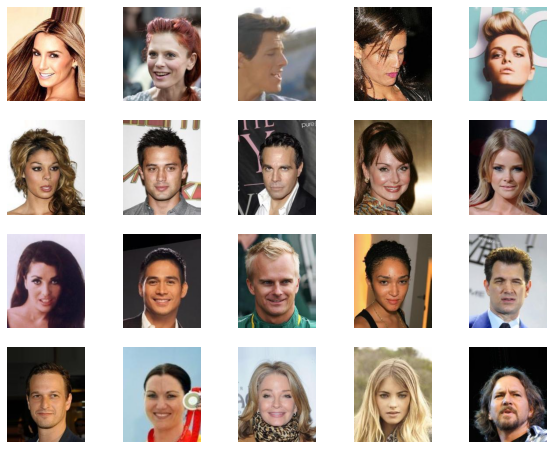

In [4]:
# Set the directory path where the images are located
directory_path = os.environ['DATASET_PATH']

# Get a list of all the image files in the directory
image_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith('.jpg')]

# Sort the list of image files by name (optional)
image_files.sort()

# Create a subplot grid with 4 rows and 5 columns
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(10, 8))

# Loop through the first 20 images and display them in the subplot grid
for i in range(20):
    if i >= len(image_files):
        break
    img = imread(image_files[i])
    row = i // 5
    col = i % 5
    axs[row, col].imshow(img)
    axs[row, col].axis('off')

# Display the subplot grid
plt.show()


In [5]:
print (len(image_files))

202599


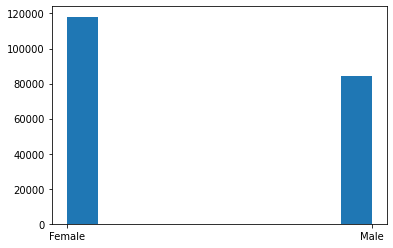

In [6]:
path = os.environ['CSVPATH']

# Load data from CSV file
df = pd.read_csv(path)

classes = {-1: 'Female', 1: 'Male'}

plt.hist(list(map(lambda x: classes[x] , df['Male'])))
plt.show()

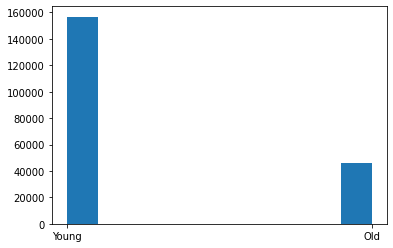

In [7]:
classes = {-1: 'Old', 1: 'Young'}

plt.hist(list(map(lambda x: classes[x] , df['Young'])))
plt.show()

## Models

### Discriminator

In [16]:
def make_discriminator_model():
    model = tf.keras.Sequential([
        layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[128, 128, 3]),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(1)
    ])

    return model

In [17]:
discriminator = make_discriminator_model()
discriminator.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 64, 64, 64)        4864      
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 64, 64, 64)        0         
                                                                 
 dropout_11 (Dropout)        (None, 64, 64, 64)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 128)       204928    
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 32, 32, 128)       0         
                                                                 
 dropout_12 (Dropout)        (None, 32, 32, 128)       0         
                                                                 
 flatten_5 (Flatten)         (None, 131072)           